In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
len(df)

47692

In [4]:
df = pd.read_csv("cyberbullying_tweets.csv")
len(df[df["cyberbullying_type"]!="not_cyberbullying"])

39747

In [6]:
df[df["cyberbullying_type"].str.contains("<html>", na=False)]

,tweet_text,cyberbullying_type


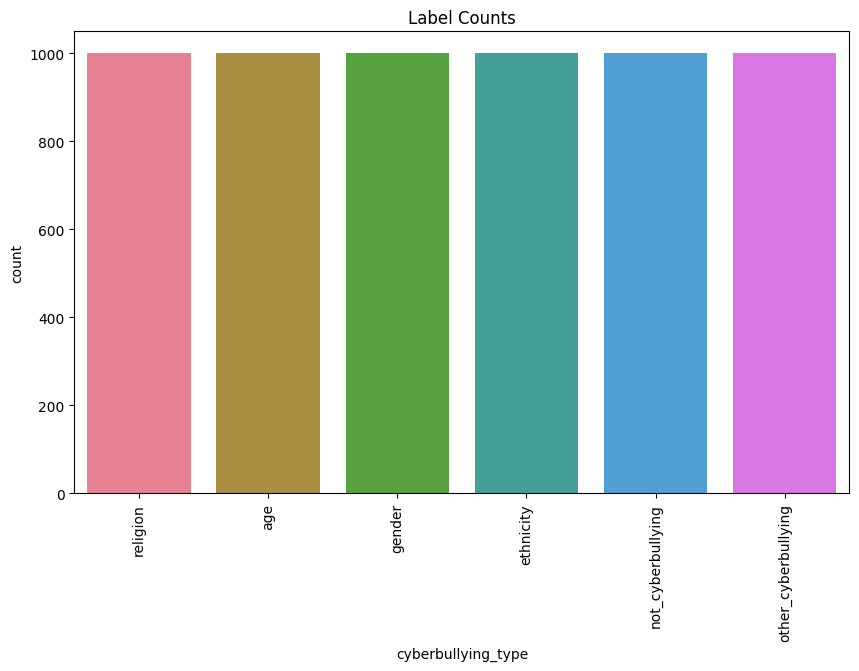

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
import pandas as pd

data = {
    "cyberbullying_type": [
        "religion",
        "age",
        "gender",
        "ethnicity",
        "not_cyberbullying",
        "other_cyberbullying",
    ]
    * 1000
}
df = pd.DataFrame(data)

# Define a color palette
palette = sns.color_palette("husl", len(df["cyberbullying_type"].unique()))

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="cyberbullying_type", palette=palette)

# Set the title and rotate x-axis labels
plt.title("Label Counts")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [8]:
df = pd.read_csv("cyberbullying_tweets.csv",nrows=20000)

In [9]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [10]:
df.iloc[2]["tweet_text"]

'@XochitlSuckkks a classy whore? Or more red velvet cupcakes?'

In [11]:
df["cyberbullying_type"].value_counts()

cyberbullying_type
gender               7973
not_cyberbullying    7945
religion             4082
Name: count, dtype: int64

In [11]:
import pandas as pd

# Assuming df is your original DataFrame
df = pd.read_csv("cyberbullying_tweets.csv")  # Load your data if not already loaded

# Group by 'cyberbullying_type' and sample 4000 from each group
sampled_df = (
    df.groupby("cyberbullying_type")
    .apply(lambda x: x.sample(n=4000, random_state=42))
    .reset_index(drop=True)
)

# Display the new dataset
print(sampled_df.head())

# Save the new dataset to a CSV file if needed
sampled_df.to_csv("sampled_dataset.csv", index=False)

                                          tweet_text cyberbullying_type
0  Every single one is a girl that would have bul...                age
1  that post ab kpop stans going to school togeth...                age
2  Because some people have nothing better to do,...                age
3  Bro I coach JV this past year at Skyline....Br...                age
4  These ladies really do remind me of the high s...                age


In [12]:
# sampled_df["cyberbullying_type"].value_counts()

In [13]:
to_replace = ["religion", "age", "gender", "ethnicity", "other_cyberbullying"]

In [14]:
new_df = df.copy()
for i in to_replace:
    new_df["cyberbullying_type"] = new_df["cyberbullying_type"].replace(i, 1)

In [15]:
new_df["cyberbullying_type"] = new_df["cyberbullying_type"].replace(
    "not_cyberbullying", 0
)

In [16]:
# new_df = sampled_df.copy()

In [17]:
new_df.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

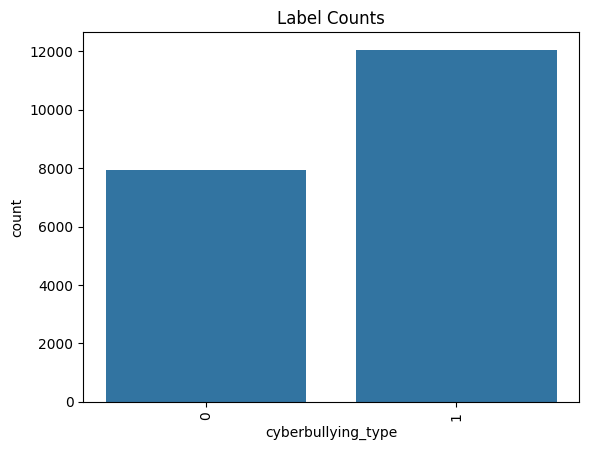

In [18]:
plt.title("Label Counts")
sns.countplot(data=new_df, x="cyberbullying_type")
plt.plot()
plt.xticks(rotation=90)

In [19]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [20]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [21]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
all_text = " ".join(new_df["tweet_text"].values)
all_text = re.sub(r"http\S+", "", all_text)
all_text = re.sub(r"@\S+", "", all_text)
all_text = re.sub(r"#\S+", "", all_text)
words = all_text.split()

In [23]:
stop_words = set(stopwords.words("english"))
words = [word for word in words if not word in stop_words]

In [24]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 5256),
 ('rape', 2962),
 ('gay', 2507),
 ('RT', 2103),
 ('jokes', 2038),
 ('like', 1739),
 ('people', 1336),
 ("I'm", 1167),
 ('&amp;', 1117),
 ('joke', 1114),
 ('The', 1021),
 ('call', 955),
 ('u', 942),
 ('You', 932),
 ('think', 896),
 ('get', 863),
 ('make', 862),
 ('women', 811),
 ('know', 739),
 ('one', 738),
 ('Muslim', 733),
 ('Muslims', 728),
 ('female', 703),
 ('sexist', 668),
 ('-', 650),
 ('And', 638),
 ('would', 637),
 ('jokes,', 615),
 ('Christian', 605),
 ('woman', 571),
 ('If', 561),
 ('support', 560),
 ('say', 542),
 ('even', 523),
 ('want', 520),
 ('see', 512),
 ('right', 504),
 ('men', 502),
 ('idiots', 488),
 ('never', 483),
 ('still', 469),
 ('But', 467),
 ('made', 458),
 ('go', 456),
 ('really', 451),
 ('idiot', 447),
 ('This', 445),
 ('A', 444),
 ('So', 443),
 ('making', 443),
 ('.', 430),
 ('Islamic', 429),
 ('bitch', 428),
 ('need', 418),
 ("can't", 412),
 ('hate', 410),
 ('Rape', 409),
 ('Kat', 399),
 ('What', 390),
 ('They', 386),
 ('said', 384),
 ('bul

In [25]:
slang_dict = {
    "u": "you",
    "r": "are",
    "ur": "your",
    "4": "for",
    "b4": "before",
    "gr8": "great",
    "l8r": "later",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "idk": "I don't know",
    "im": "I am",
    "w/": "with",
    "w/o": "without",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "btw": "by the way",
    "bff": "best friend forever",
    "ttyl": "talk to you later",
    "brb": "be right back",
    "bc": "because",
    "cya": "see you",
    "luv": "love",
    "y": "why",
    "tho": "though",
    "til": "until",
    "ikr": "I know, right",
    "tbh": "to be honest",
    "np": "no problem",
    "jk": "just kidding",
    "smh": "shaking my head",
    "omw": "on my way",
    "thru": "through",
    "fav": "favorite",
    "msg": "message",
    "dm": "direct message",
    "bday": "birthday",
    "xoxo": "hugs and kisses",
}

In [157]:
new_df["tweet_text"] = new_df["tweet_text"].str.lower()

In [158]:
new_df["tweet_text"] = new_df["tweet_text"].apply(
    lambda text: " ".join([slang_dict.get(word, word) for word in text.split()])
)

In [159]:
new_df

,tweet_text,cyberbullying_type,cleaned_text
0,"in other words #katandandre, your food was cra...",0,word food crapilici !
1,why is #aussietv so white? #mkr #theblock #ima...,0,white ?
2,@xochitlsuckkks a classy whore? or more red ve...,0,classi whore ? red velvet cupcak ?
3,"@jason_gio meh. :p thanks for the heads up, bu...",0,"meh . : p thank head , concern anoth angri dud..."
4,@rudhoeenglish this is an isis account pretend...,0,isi account pretend kurdish account . like isl...
...,...,...,...
19995,i am christian who definitely does not support...,1,"christian definit support tlaib , whatev 2020 ..."
19996,@yousufpoosuf @rkinglive2dance @izrinhariri no...,1,", quot mean exactli say . peopl natur less hat..."
19997,how can you say barack obama was the best pres...,1,say barack obama best presid ever one brought ...
19998,another mentally ill asylum seeker. wthell do ...,1,anoth mental ill asylum seeker . wthell take u...


In [160]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [161]:
from nltk.stem import PorterStemmer

In [162]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub("<.*?>", "", text)

    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Join the words back into a string
    text = " ".join(words)
    return text

In [163]:
new_df["cleaned_text"] = new_df["tweet_text"].apply(clean_text)

In [164]:
from sklearn.feature_extraction.text import CountVectorizer

In [165]:
cv = CountVectorizer()
X = cv.fit_transform(new_df["cleaned_text"]).toarray()
y = new_df["cyberbullying_type"]

In [166]:
y

0        0
1        0
2        0
3        0
4        0
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: cyberbullying_type, Length: 20000, dtype: int64

In [167]:
len(X)

20000

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train a Logistic Regression Model
clf = LogisticRegression(max_iter=1000)

In [170]:
# from sklearn.linear_model import SGDClassifier

In [171]:
# clf = SGDClassifier(loss='log_loss')


# batch_size = 1000
# for i in range(0, X_train.shape[0], batch_size):
#     end = i + batch_size if i + batch_size < X_train.shape[0] else X_train.shape[0]
#     clf.partial_fit(X_train[i:end], y_train[i:end], classes=np.unique(y_train))

# accuracy = clf.score(X_test, y_test)
# print(f"Accuracy: {accuracy}")

In [172]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [173]:
y_pred = clf.predict(X_test)

In [174]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.901


In [180]:
word = cv.transform(["you are such a nigger"])

In [181]:
clf.predict(word)

array([0])

In [46]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Assuming clf is your classifier and X, y are your data and labels
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    clf.fit(X_train, y_train)

    # Evaluate the model
    score = clf.score(X_test, y_test)
    cv_scores.append(score)

    # Print the output for each step
    print(f"Fold {fold + 1}:")
    print(f"  Training size: {len(train_index)}")
    print(f"  Test size: {len(test_index)}")
    print(f"  Accuracy: {score}")

# Convert cv_scores to a numpy array for easy calculation of mean and std
cv_scores = np.array(cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"\nMean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

Fold 1:
  Training size: 16000
  Test size: 4000
  Accuracy: 0.901
Fold 2:
  Training size: 16000
  Test size: 4000
  Accuracy: 0.898
Fold 3:
  Training size: 16000
  Test size: 4000
  Accuracy: 0.892
Fold 4:
  Training size: 16000
  Test size: 4000
  Accuracy: 0.89625
Fold 5:
  Training size: 16000
  Test size: 4000
  Accuracy: 0.90075

Mean Accuracy: 0.8976000000000001
Standard Deviation: 0.0033113441379597004


# exporting model

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression(max_iter=500)

# Define the hyperparameters to tune
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None], 
    "C": [0.01, 0.1, 1, 10, 100], 
    "solver": ["liblinear", "saga"],  
}


grid_search = GridSearchCV(
    estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy"
)


grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

In [66]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1600
           1       0.94      0.89      0.92      2400

    accuracy                           0.90      4000
   macro avg       0.89      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test,y_pred)

array([[1461,  139],
       [ 257, 2143]], dtype=int64)

<Axes: >

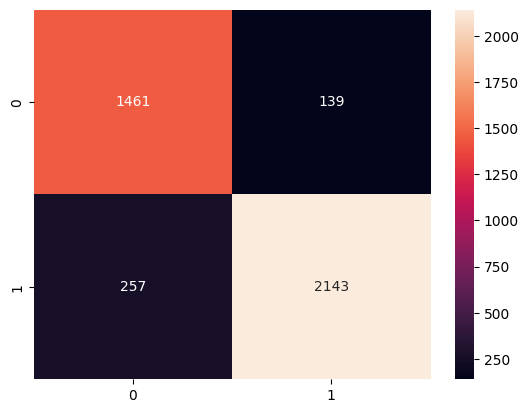

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")

In [89]:
new_df[new_df["cyberbullying_type"]==1]

,tweet_text,cyberbullying_type,cleaned_text
7945,rape is real..zvasiyana nema jokes about being...,1,rape real .. zvasiyana nema joke drunk gay les...
7946,you never saw any celebrity say anything like ...,1,never saw celebr say anyth like obama : b mahe...
7947,"@manhattaknight i mean he's gay, but he uses g...",1,"mean 's gay , use gender slur make rape joke"
7948,rt @raul_novoa16: @aliciabernardez @alex_aim @...,1,rt feminazi
7949,rape is rape. and the fact that i read one pos...,1,rape rape . fact read one post guy get rape co...
...,...,...,...
19995,i am christian who definitely does not support...,1,"christian definit support tlaib , whatev 2020 ..."
19996,@yousufpoosuf @rkinglive2dance @izrinhariri no...,1,", quot mean exactli say . peopl natur less hat..."
19997,how can you say barack obama was the best pres...,1,say barack obama best presid ever one brought ...
19998,another mentally ill asylum seeker. wthell do ...,1,anoth mental ill asylum seeker . wthell take u...


In [100]:
inp = cv.transform(["You look like a gay"])

prediction = clf.predict(inp)

print(prediction)

[1]


In [78]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [250]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


def clean_text(text):

    text = re.sub("<.*?>", "", text)


    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)

    words = nltk.word_tokenize(text)


    words = [w for w in words if w not in stopwords.words("english")]


    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]


    text = " ".join(words)
    return text


clean_transformer = FunctionTransformer(
    lambda x: [clean_text(text) for text in x], validate=False
)

model = Pipeline(
    [
        ("cleaner", clean_transformer),  
        ("vectorizer", CountVectorizer()),  
        ("classifier", LogisticRegression(max_iter=1000)),  
    ]
)

X = new_df["tweet_text"]
model.fit(X, y)

Pipeline(steps=[('cleaner',
                 FunctionTransformer(func=<function <lambda> at 0x000001A539EFA520>)),
                ('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [251]:
model.predict(["You are definitely gay, you are so ugly"])

array([1])

In [252]:
model.predict(["I am proud to be sexist"])

array([1])

In [271]:
model.predict(["You must be a terrorist, you are from india"])

array([1])

In [272]:
model.predict(["You son of a bitch"])

array([1])

In [268]:
model.predict(["rape is common in your country"])

array([1])

In [256]:
new_df[new_df["cyberbullying_type"] == 1]["cleaned_text"].iloc[800]

"rt 'm sexist , 'd prefer make sammich , instead read twitter ."

In [257]:
new_df[new_df["cyberbullying_type"] == 1]["tweet_text"].iloc[800]

"rt @dyslexicdwarf i'm not sexist, i'd just prefer it if she was making me a sammich, instead of reading twitter."

In [123]:
X

0                                    word food crapilici !
1                                                  white ?
2                       classi whore ? red velvet cupcak ?
3        meh . : p thank head , concern anoth angri dud...
4        isi account pretend kurdish account . like isl...
                               ...                        
19995    christian definit support tlaib , whatev 2020 ...
19996    , quot mean exactli say . peopl natur less hat...
19997    say barack obama best presid ever one brought ...
19998    anoth mental ill asylum seeker . wthell take u...
19999    shame . bhagat singh kill innoc . islam terror...
Name: cleaned_text, Length: 20000, dtype: object

In [117]:
y

0        0
1        0
2        0
3        0
4        0
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: cyberbullying_type, Length: 20000, dtype: int64

In [235]:
new_df[new_df["tweet_text"].str.contains("nigga") & new_df["cyberbullying_type"] == 1]["tweet_text"].iloc[0]

"i always get fucking pissed when i see a man joke about the sexual abuse of another man. “wow. please she should come &amp; rape me too, some of us want.” “mans is complaining. nigga you gay? ” what foolishness, mocking and minimizing someone's pain for bants. are you okay at all?"